In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mall_customers = pd.read_csv('Mall_Customers.csv')
mall_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
mall_customers = mall_customers.drop(['CustomerID', 'Gender', 'Age'], axis = 1)
mall_customers

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## DATA ANALYSIS

Text(0.5, 0, 'Range Pendapatan Per Tahun (k$)')

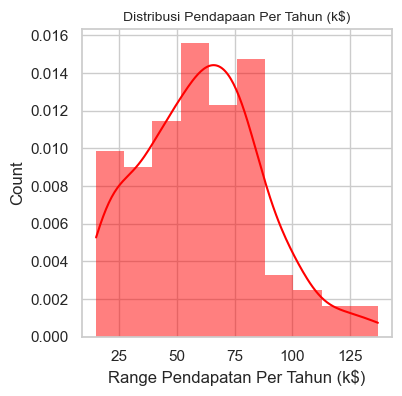

In [9]:
plt.figure(figsize = (4,4))
sns.set(style = 'whitegrid')
sns.histplot(mall_customers['Annual Income (k$)'], color = 'red', kde = True, stat = 'density', linewidth = 0)
plt.title('Distribusi Pendapaan Per Tahun (k$)', fontsize = 10)
plt.ylabel('Count')
plt.xlabel('Range Pendapatan Per Tahun (k$)')

Text(0.5, 0, 'Range Pengeluaran (k$)')

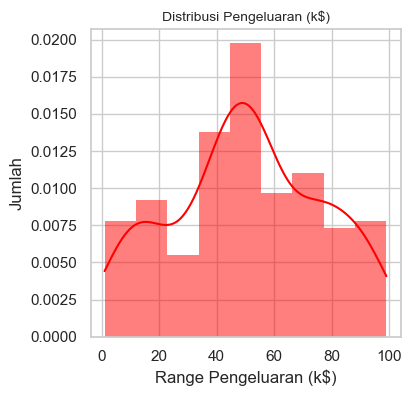

In [13]:
plt.figure(figsize = (4,4))
sns.set(style = 'whitegrid')
sns.histplot(mall_customers['Spending Score (1-100)'], color = 'red', kde = True, stat = 'density', linewidth = 0)
plt.title('Distribusi Pengeluaran (k$)', fontsize = 10)
plt.ylabel('Jumlah')
plt.xlabel('Range Pengeluaran (k$)')

## CLUSTERING

<function matplotlib.pyplot.show(close=None, block=None)>

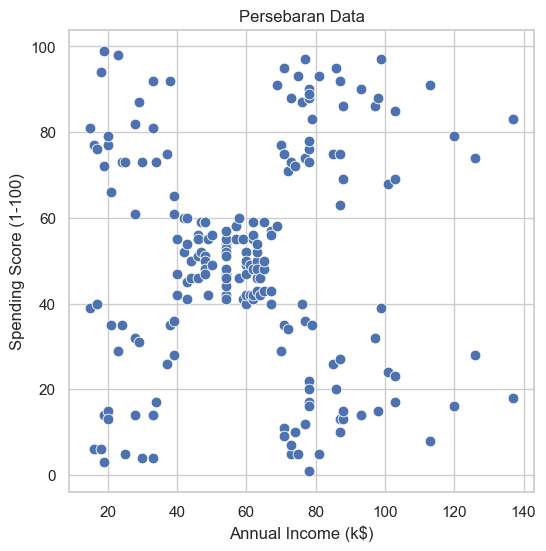

In [16]:
# PERSEBARAN DATA
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                data = mall_customers, s = 60)
plt.title('Persebaran Data')
plt.show

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(mall_customers)
    wcss.append(kmModel.inertia_)

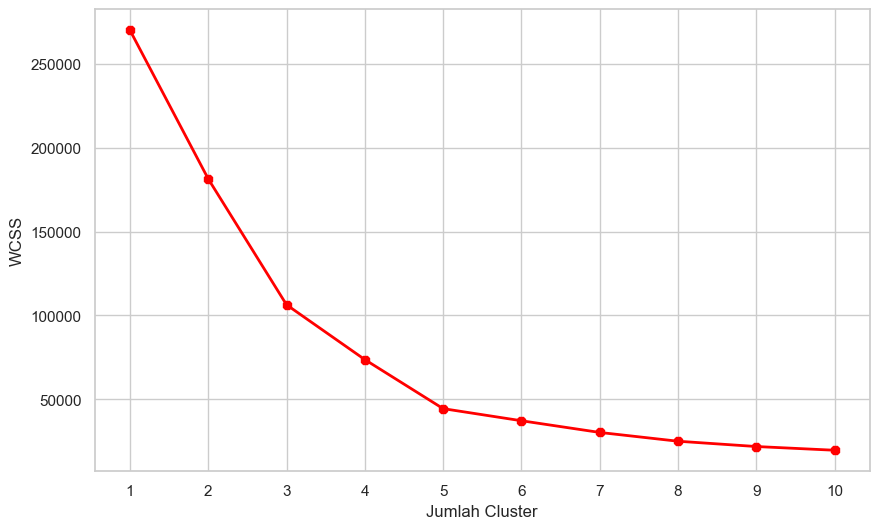

In [36]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()

In [38]:
kmModelFix = KMeans(n_clusters = 5, n_init = 10)
kmModelFix.fit(mall_customers)
hasil_prediksi = kmModelFix.predict(mall_customers)
print(hasil_prediksi)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 4 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 0 1 4 1 0 1 0 1 4 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [40]:
mall_customers['Label'] = hasil_prediksi
mall_customers.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3


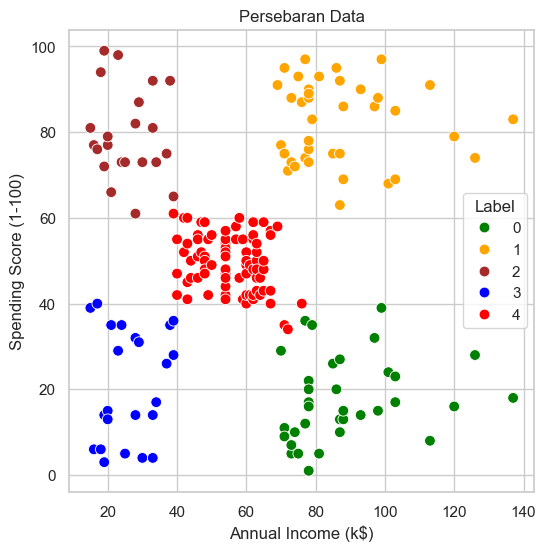

In [50]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = 'Label', palette = ['green', 'orange', 'brown', 'blue', 'red'], 
                legend = 'full', data = mall_customers, s = 60)
plt.title('Persebaran Data')
plt.show()